### Logistic Regression for imbalanced data

In [1]:
# Generate and plot a synthetic imbalanced classifation dataset
from collections import Counter
from sklearn.datasets import make_classification

In [7]:
X,y =make_classification(n_samples=10000 , n_features=2 , n_clusters_per_class=1 ,
                         n_redundant=0 , weights=[0.99],random_state=10)

In [16]:
Counter(y)

Counter({0: 9846, 1: 154})

In [8]:
# Convert X into a DataFrame
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])

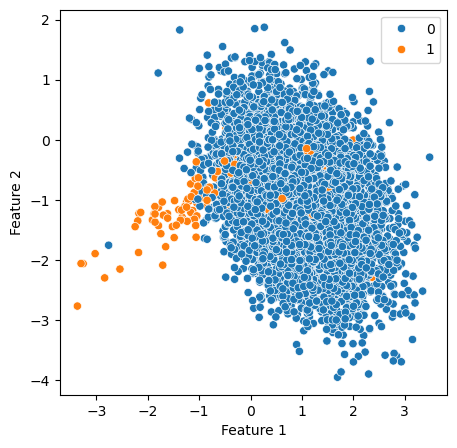

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(5, 5))
sns.scatterplot(x=df["Feature 1"], y=df["Feature 2"], hue=y)
plt.show()

In [15]:
#Split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test=train_test_split( X , y ,test_size=0.25, random_state=42)


In [18]:
class_weight=[{0:w , 1:y} for w in [1, 10 , 50 ,100] for y in[1,10 , 50 , 100]]
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [19]:
# Hyperparamter Tuning
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model=LogisticRegression()
penalty=['l2','l1','elasticnet']
c_values=[100 , 10 , 0.1  , 1.0 , 0.01]
solver=['newton-cg' , 'lfbgs' , 'liblinear' , 'sab','saga']
class_weight=[{0:w , 1: y} for w in [1, 10 , 50 ,100] for y in[1,10 , 50 , 100]]

In [20]:
params=dict(penalty=penalty , C=c_values ,class_weight=class_weight, solver=solver)

In [21]:
params

{'penalty': ['l2', 'l1', 'elasticnet'],
 'C': [100, 10, 0.1, 1.0, 0.01],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}],
 'solver': ['newton-cg', 'lfbgs', 'liblinear', 'sab', 'saga']}

In [22]:
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=model ,param_grid=params, scoring='accuracy' ,cv=cv , n_jobs=-1)


In [23]:
grid.fit(X_train , y_train)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
4000 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
251 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\ut

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 0.1, 1.0, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l2', 'l1', 'elasticnet'],
                         'solver': ['newton-cg', 'lfbgs', 'liblinear', 'sab',
                                    'saga']},
             scoring='accuracy')

In [24]:
grid.best_params_

{'C': 100,
 'class_weight': {0: 50, 1: 100},
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [25]:
y_pred=grid.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
score=accuracy_score(y_test, y_pred)
print(score)
cm=confusion_matrix(y_test , y_pred)
print(cm)
print(classification_report(y_test , y_pred))

0.9896
[[2465    0]
 [  26    9]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2465
           1       1.00      0.26      0.41        35

    accuracy                           0.99      2500
   macro avg       0.99      0.63      0.70      2500
weighted avg       0.99      0.99      0.99      2500

